#### Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## OHE Encoding Task

In [5]:
# synitaize data 
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['amr', 'ali' , 'sara', 'omar', 'salma'],
    })

df

,id,name
0,1,amr
1,2,ali
2,3,sara
3,4,omar
4,5,salma


In [ ]:
# OHE using pandas get_dummies
df_ohe = pd.get_dummies(df, columns=['name'], prefix='name')
df_ohe 

,id,name_ali,name_amr,name_omar,name_salma,name_sara
0,1,False,True,False,False,False
1,2,True,False,False,False,False
2,3,False,False,False,False,True
3,4,False,False,True,False,False
4,5,False,False,False,True,False


In [15]:
# convert to zeros and ones
df_ohe = df_ohe.replace({False: 0, True: 1})
df_ohe

C:\Users\laphouse\AppData\Local\Temp\ipykernel_24060\3146968717.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ohe = df_ohe.replace({False: 0, True: 1})


,id,name_ali,name_amr,name_omar,name_salma,name_sara
0,0,0,1,0,0,0
1,2,1,0,0,0,0
2,3,0,0,0,0,1
3,4,0,0,1,0,0
4,5,0,0,0,1,0


In [16]:
# using sklearn OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[['name']])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['name']))
df_encoded

,name_ali,name_amr,name_omar,name_salma,name_sara
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [17]:
# can reduce the number of columns by using drop_first=True
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded_reduced = encoder.fit_transform(df[['name']])
df_encoded_reduced = pd.DataFrame(df_encoded_reduced, columns=encoder.get_feature_names_out(['name']))
df_encoded_reduced

,name_amr,name_omar,name_salma,name_sara
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


## Outlier Handling Task

In [49]:
# Synthetic data with outliers
np.random.seed(42) 

df_outliers = pd.DataFrame({
    'id': list(range(1, 101)),
    'value': list(np.random.normal(loc=0, scale=1, size=97)) + [6, 30, 22]  # 97 normal points + 3 outliers
})

In [50]:
df_outliers

,id,value
0,1,0.496714
1,2,-0.138264
2,3,0.647689
3,4,1.523030
4,5,-0.234153
...,...,...
95,96,-1.463515
96,97,0.296120
97,98,6.000000
98,99,30.000000


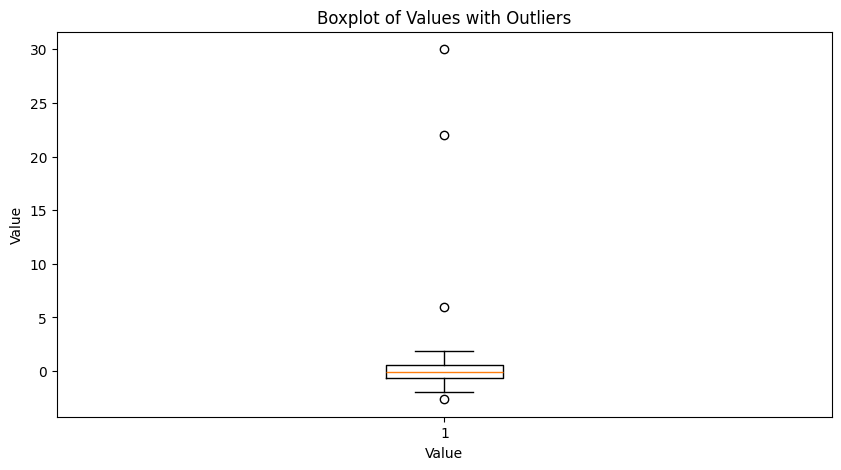

In [51]:
# plot Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df_outliers['value'])
plt.title('Boxplot of Values with Outliers')
plt.xlabel('Value')
plt.ylabel('Value')
plt.show()

In [54]:
# get outliers using IQR method
Q1 = df_outliers['value'].quantile(0.25)
Q3 = df_outliers['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# filter out outliers
df_no_outliers = df_outliers[(df_outliers['value'] >= lower_bound) & (df_outliers['value'] <= upper_bound)]
# display the original and cleaned dataframes
df_outliers, df_no_outliers


(     id      value
 0     1   0.496714
 1     2  -0.138264
 2     3   0.647689
 3     4   1.523030
 4     5  -0.234153
 ..  ...        ...
 95   96  -1.463515
 96   97   0.296120
 97   98   6.000000
 98   99  30.000000
 99  100  22.000000
 
 [100 rows x 2 columns],
     id     value
 0    1  0.496714
 1    2 -0.138264
 2    3  0.647689
 3    4  1.523030
 4    5 -0.234153
 ..  ..       ...
 92  93 -0.702053
 93  94 -0.327662
 94  95 -0.392108
 95  96 -1.463515
 96  97  0.296120
 
 [96 rows x 2 columns])

- 4 data points are outliers as they are outside the IQR range
- can drop them all

In [53]:
# handling outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df_outliers['value']))
outliers_z = df_outliers[z_scores > 2]  # threshold of 2 for Z-score, signficance=5% (CI=95%)
df_no_outliers_z = df_outliers[z_scores <= 2] 
# display the original and cleaned dataframes
df_outliers, df_no_outliers_z

(     id      value
 0     1   0.496714
 1     2  -0.138264
 2     3   0.647689
 3     4   1.523030
 4     5  -0.234153
 ..  ...        ...
 95   96  -1.463515
 96   97   0.296120
 97   98   6.000000
 98   99  30.000000
 99  100  22.000000
 
 [100 rows x 2 columns],
     id     value
 0    1  0.496714
 1    2 -0.138264
 2    3  0.647689
 3    4  1.523030
 4    5 -0.234153
 ..  ..       ...
 93  94 -0.327662
 94  95 -0.392108
 95  96 -1.463515
 96  97  0.296120
 97  98  6.000000
 
 [98 rows x 2 columns])

- 2 of them are truely outliers (outside the confidence interval), thats why we dropped them 